<a href="https://colab.research.google.com/github/mvs0301/STPPOD/blob/main/Taxes_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Финансовый университет при Правительстве Российской Федерации

# Современные технологии прикладного программирования и обработки данных
## Тема 1. Введение в программирование на языке Python
### Вопрос 1. Интерактиваная среда iPython
#### Учебный пример. Обработка данных в интерактивной среде Гугл колаб.

9 марта 2021 года. 
Поток У18-7У.

Пусть имеются три фирмы: "Mars", "Saturn", "Venus", о которых известно, какие они заплатили налоги в 2017, 2019 и 2020 годах. Данные за 2018 год временно недоступны, но их нам обещали прислать коллеги чуть позже. Введем имеющиеся данные и построим график. Отправим их коллегам и попросим добавить данные за 2018 год. Получим ответ и обновим график.

Для реализации задуманного нам потребуются библиотеки, которые надо импортировать.

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
% matplotlib inline

Сейчас интересующие нас данные никак не организованы и находятся в разных отчетах. Соберем их в одном месте. Выберем для этого удобную форму. 

Представленная в следующей ячейке конструкция в фигурных скобках называется "словарь". Словарь состоит из элементов, разделенных запятыми. Каждый элемент является парой "ключ":значение. В данном словаре ключами являются названия фирм, они указываются в кавычках. Какие кавычки использовать - одинарные или двойные - в данном случае не важно. Каждое значение представляет собой список величин уплаченного налога в 2017, 2019, 2020 годах. Присвоим словарю имя *taxes*.

In [ ]:
taxes={'Mars':[100,123,114], 'Saturn':[117,162,178], 'Venus':[211,204,225]}

Такие данные, как в словаре *taxes*, удобно представить в табличном виде. Для этого создадим объект *data* с помощью конструкции *pandas.DataFrame()*. В качестве параметров конструкции укажем словарь *taxes* и список лет, в которые уплачивались налоги.

In [ ]:
data=pd.DataFrame(taxes,index=[2017,2019,2020])
data

,Mars,Saturn,Venus
2017,100,117,211
2019,123,162,204
2020,114,178,225


Построим столбчатую диаграмму, вызвав у объекта *data* метод *plot(knid='bar').* Дополнительные параметры *figsize* и *ylim* позволяют задать размер области построения и интервал значений по вертикальной оси.

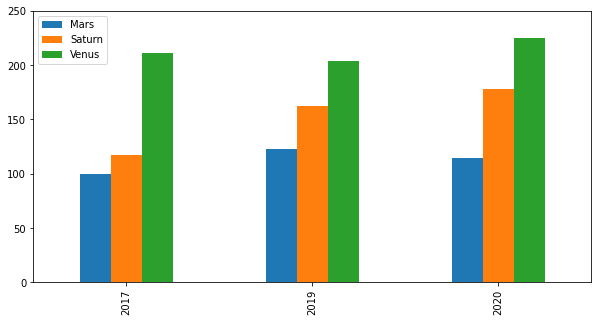

In [ ]:
data.plot(kind='bar', y=['Mars', 'Saturn', 'Venus'],
          figsize=(10,5),
          ylim=(0,250))

Теперь отправим наши данные коллегам и попросим добавить данные за 2018 год. Для обмена данными удобен формат *csv*. Сохраним наши данные в *csv*-файле с именем *taxes.csv*. Для этого выполним у объекта *data* метод *to_csv()*.

In [ ]:
data.to_csv('taxes.csv')

Теперь данные находятся в csv-файле. Вот как выглядит этот файл:
```
,Mars,Saturn,Venus
2017,100,117,211
2019,123,162,204
2020,114,178,225
```
Но где этот файл? На виртуальной машине Гугл, которая работает под управлением операционной системы Unix. Чтобы увидеть этот файл в файловой системе Unix выполним команду `!ls`

In [ ]:
!ls

sample_data  taxes.csv


Загрузим файл на локальный диск с помощью `.download()`

In [ ]:
files.download('taxes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Теперь файл находится на локальном диске в папке "Загрузки". Отправим его коллегам по электронной почте.

Коллеги открыли наш файл в Блокноте Windiws, добавили одну строчку с данными за 2018 год и отправили файл нам. Теперь файл выглядит так:
```
,Mars,Saturn,Venus
2017,100,117,211
2018,110,131,150
2019,123,162,204
2020,114,178,225
```
Присвоим обновленному файлу имя *taxes_upd.csv* Теперь отправим обновленный файл на виртуальную машину Гугл колаб. Для этого выполним команду `files.upload()`, нажмем на кнопку "Обзор" и в открывшемся диалоговом окне укажем местоположение *taxes_upd.csv* на локальном диске.

In [ ]:
files.upload()

Saving taxes_upd.csv to taxes_upd.csv


{'taxes_upd.csv': b',Mars,Saturn,Venus\n2017,100,117,211\n2018,110,131,150\n2019,123,162,204\n2020,114,178,225\n'}

Загрузим обновленный файл в таблицу. Здесь нам потребуется  параметр *index_col=0*, так как года в этой таблице являются метками строк, и надо явно указать, что эти метки находятся в крайнем левом (нулевом) столбце файла *taxes_upd.csv*

In [ ]:
data=pd.read_csv('taxes_upd.csv', index_col=0)
data

,Mars,Saturn,Venus
2017,100,117,211
2018,110,131,150
2019,123,162,204
2020,114,178,225


Построим график на основе обновленных данных.

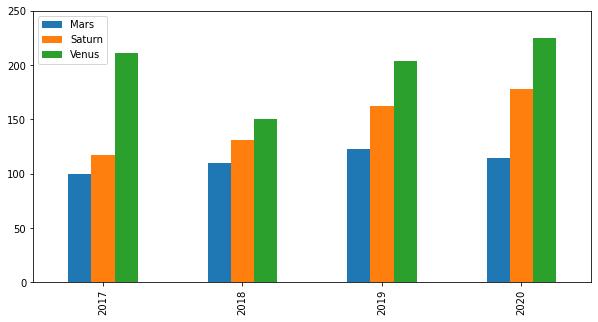

In [ ]:
data.plot(kind='bar', y=['Mars', 'Saturn', 'Venus'],
          figsize=(10,5),
          ylim=(0,250))

Задача решена.